# Final Project - Clustering Volcanoes according to eruption time

The 'eruptions.csv' file contains 10000 rows of volcanic activity information. The first column is the duration of the eruption, and the second is time between two eruptions. Clustering should be applied on the entire dataset. 

### Perform the following operations:
1. Read the dataset in python using pandas. Plot a scatter of the two columns. 
2. Run the Kmeans algorithm on this dataset(using random). Choose the appropriate number of clusters for this data. 
3. Plot the output of Kmeans, colored according to clusters and obtained centroids. 
5. For each cluster plot the line from the centroid to the farthest point in the cluster. 
6. Find out all the points in the cluster which have a distance greater than the mean of the cluster, . 
6. What is average distance of each cluster? (From the centroid to all points in the cluster)
7. For the following points, find out which cluster they fall in?  
dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5  
wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100  
Plot these points in separate markers & color along with the clusters

## Read the dataset in python using pandas. Plot a scatter of the two columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv('./data/eruptions.csv')
df.head()

,dur_eruptions,wait_time_btn_eruptions
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Text(0.5,1,'Clustering Volcanoes according to eruption time')

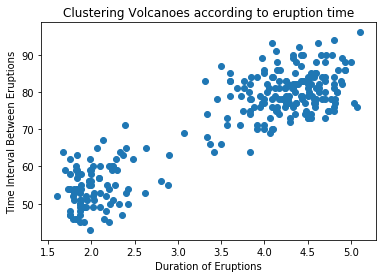

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'])
plt.xlabel('Duration of Eruptions')
plt.ylabel('Time Interval Between Eruptions')
plt.title('Clustering Volcanoes according to eruption time')

## Run the Kmeans algorithm on this dataset(using random). Choose the appropriate number of clusters for this data.

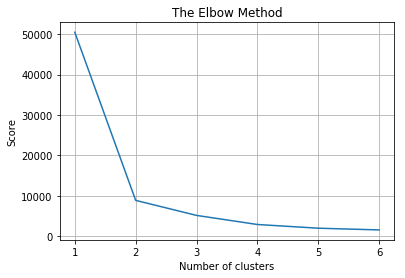

In [4]:
max_clusters=7
l=[]

for i in range(1,max_clusters):
    kmeans=KMeans(n_clusters=i,max_iter=300,init='random',random_state=0) 
    kmeans.fit(df[['dur_eruptions','wait_time_btn_eruptions']])
    l.append(kmeans.inertia_)
    
plt.plot(range(1,max_clusters),l)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score') 
plt.grid()
plt.show()

In [5]:
kmeans=KMeans(n_clusters=2,init='random')
y_kmeans=kmeans.fit_predict(df)
c=kmeans.cluster_centers_
c

array([[ 4.29793023, 80.28488372],
       [ 2.09433   , 54.75      ]])

## Plot the output of Kmeans, colored according to clusters and obtained centroids.

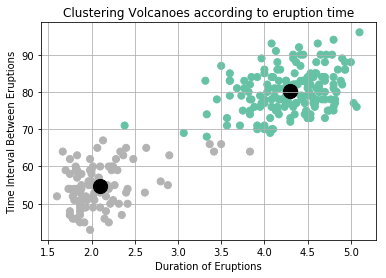

In [6]:
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],c=y_kmeans,s=50,cmap='Set2')
plt.grid()

plt.scatter(c[:,0],c[:,1],c='black',s=200)
plt.xlabel('Duration of Eruptions')
plt.ylabel('Time Interval Between Eruptions')
plt.title('Clustering Volcanoes according to eruption time')
plt.show()

In [7]:
print("Clusters found in {0} iterations".format(kmeans.n_iter_))

Clusters found in 3 iterations


## For each cluster plot the line from the centroid to the farthest point in the cluster.

In [8]:
maxi=[0,0]
ind=[0,0]
sum_=[0,0]
l0=0
l1=0

for i in range(len(df)):
    dist=0
    for j in range(len(c)):
        if(y_kmeans[i]==j):
            dist=(((c[j,0]-int(df.iloc[i,0]))**2) + ((c[j,1]-int(df.iloc[i,1]))**2))**(1/2)           
            if y_kmeans[i]==0:
                sum_[0]+=dist
                l0+=1
            else:
                sum_[1]+=dist
                l1+=1
                
            if dist > maxi[j]:
                maxi[j]=dist
                ind[j]=i
               

In [9]:
x1,y1=df.iloc[ind[0],]
x2,y2=df.iloc[ind[1],]

print("Farthest Point in cluster 1 is ({},{})".format(x1,y1))
print("Farthest Point in cluster 2 is ({},{})".format(x2,y2))


Farthest Point in cluster 1 is (5.1,96.0)
Farthest Point in cluster 2 is (2.133,67.0)


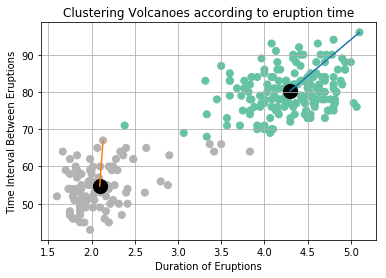

In [10]:
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],c=y_kmeans,s=50,cmap='Set2')
plt.scatter(c[:,0],c[:,1],c='black',s=200)

plt.plot((x1,c[0][0]),(y1,c[0][1]))
plt.plot((x2,c[1][0]),(y2,c[1][1]))

plt.grid()

plt.xlabel('Duration of Eruptions')
plt.ylabel('Time Interval Between Eruptions')
plt.title('Clustering Volcanoes according to eruption time')
plt.show()

## Find out all the points in the cluster which have a distance greater than the mean of the cluster.

In [11]:
c1_mean=sum_[0]/l0
c2_mean=sum_[1]/l1

mean=[c1_mean,c2_mean]
ind1=[]
ind2=[]

for i in range(len(df)):
    dist=0
    for j in range(len(c)):
        if(y_kmeans[i]==j):
            dist=(((c[j,0]-float(df.iloc[i,0]))**2) + ((c[j,1]-float(df.iloc[i,1]))**2))**(1/2)
            if(y_kmeans[i]==0):
                if dist > mean[0]:
                    ind1.append(i)
            else:
                   if dist>mean[1]:
                        ind2.append(i)
                        
            

In [12]:
cluster_1=df[y_kmeans==0]
cluster_2=df[y_kmeans==1]

points_1=[]
points_2=[]

for i in ind1:
    x,y=cluster_1.loc[i,:]
    points_1.append((x,y))

for i in ind2:
    x,y=cluster_2.loc[i,:]
    points_2.append((x,y))

print("All the points in the cluster 1 which have a distance greater than the mean of the cluster 1 are:\n")
for i in points_1:
    print(i)

print()    
print("All the points in the cluster 2 which have a distance greater than the mean of the cluster 2 are:\n")
for i in points_2:
    print(i)

All the points in the cluster 1 which have a distance greater than the mean of the cluster 1 are:

(3.333, 74.0)
(4.533, 85.0)
(4.7, 88.0)
(3.6, 85.0)
(4.35, 85.0)
(3.0669999999999997, 69.0)
(4.533, 74.0)
(4.3, 73.0)
(3.833, 74.0)
(4.783, 90.0)
(4.533, 73.0)
(4.8, 75.0)
(4.716, 90.0)
(3.717, 71.0)
(4.4, 92.0)
(4.7, 73.0)
(4.0, 71.0)
(4.133, 75.0)
(4.1, 70.0)
(4.067, 73.0)
(4.933, 88.0)
(4.0, 86.0)
(4.333, 90.0)
(4.3, 72.0)
(3.75, 75.0)
(4.367, 88.0)
(4.85, 86.0)
(4.7330000000000005, 75.0)
(4.9, 89.0)
(4.6, 85.0)
(4.417, 87.0)
(4.067, 69.0)
(4.6, 88.0)
(4.65, 90.0)
(4.333, 89.0)
(4.933, 86.0)
(5.1, 96.0)
(3.5669999999999997, 71.0)
(4.0, 70.0)
(4.083, 93.0)
(3.967, 89.0)
(4.15, 86.0)
(5.0, 88.0)
(4.617, 93.0)
(3.333, 68.0)
(4.5, 73.0)
(4.0, 85.0)
(4.167, 74.0)
(3.5, 87.0)
(4.133, 91.0)
(2.383, 71.0)
(3.833, 75.0)
(4.8, 94.0)
(4.4830000000000005, 75.0)
(3.917, 70.0)
(4.083, 70.0)
(4.183, 86.0)
(4.45, 90.0)
(4.15, 75.0)
(4.933, 86.0)
(4.583, 85.0)
(4.35, 74.0)
(3.5669999999999997, 73.0)
(4

## What is average distance of each cluster? (From the centroid to all points in the cluster)

In [13]:
print("Average distance of Cluster 1 (From the centroid to all points in the cluster) is {}".format(c1_mean))
print("Average distance of Cluster 2 (From the centroid to all points in the cluster) is {}".format(c2_mean))

Average distance of Cluster 1 (From the centroid to all points in the cluster) is 4.599890507775711
Average distance of Cluster 2 (From the centroid to all points in the cluster) is 4.997593654220256


## For the following points, find out which cluster they fall in?
### dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5
### wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100
## Plot these points in separate markers & color along with the clusters

In [14]:
print("Maximum distance in cluster 1 is {}".format(maxi[0]))
print("Maximum distance in cluster 2 is {}".format(maxi[1]))

Maximum distance in cluster 1 is 15.73079087722676
Maximum distance in cluster 2 is 12.250363184367256


In [15]:
dur_eruptions = [2.5, 3.0, 3.2, 4.5, 5.0, 1.5]
wait_time_btn_eruptions = [70, 55, 70, 80, 70, 100]

points=[]
for i in range(6):
    points.append((float(dur_eruptions[i]),float(wait_time_btn_eruptions[i])))
points

[(2.5, 70.0), (3.0, 55.0), (3.2, 70.0), (4.5, 80.0), (5.0, 70.0), (1.5, 100.0)]

(2.5,70.0) Belongs to Cluster 1
(3.0,55.0) Belongs to Cluster 2
(3.2,70.0) Belongs to Cluster 1
(4.5,80.0) Belongs to Cluster 1
(5.0,70.0) Belongs to Cluster 1
(1.5,100.0) Does not belong to any luster


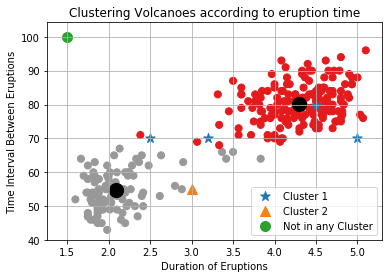

In [16]:
x1=[]
x2=[]
y1=[]
y2=[]
x=[]
y=[]

plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],c=y_kmeans,s=50,cmap='Set1',label=None)
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',s=200,label=None)
for i in range(len(points)):
    dist1=((c[0][0]-points[i][0])**2+(c[0][1]-points[i][1])**2)**0.5
    dist2=((c[1][0]-points[i][0])**2+(c[1][1]-points[i][1])**2)**0.5
    if dist1 <= maxi[0]:
        print("({0},{1}) Belongs to Cluster 1".format(points[i][0],points[i][1]))
        x1.append(points[i][0])
        y1.append(points[i][1])
    elif dist2 <= maxi[1]:
        print("({0},{1}) Belongs to Cluster 2".format(points[i][0],points[i][1]))
        x2.append(points[i][0])
        y2.append(points[i][1])
    else:
        print("({0},{1}) Does not belong to any luster".format(points[i][0],points[i][1]))
        x.append(points[i][0])
        y.append(points[i][1])
plt.scatter(x1,y1,label="Cluster 1",marker='*',s=100)
plt.scatter(x2,y2,label="Cluster 2",marker='^',s=100)    
plt.scatter(x,y,label="Not in any Cluster",marker='o',s=100)

plt.xlabel('Duration of Eruptions')
plt.ylabel('Time Interval Between Eruptions')
plt.title('Clustering Volcanoes according to eruption time')

plt.legend(loc=4)
plt.show()